In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
customers_df = pd.read_csv("../data/customers.csv")
orders_df = pd.read_csv("../data/orders.csv")
products_df = pd.read_csv("../data/products.csv")
sales_df = pd.read_csv("../data/sales.csv")


In [ ]:
customers_df.info()
print("jumlah null:\n",customers_df.isna().sum(), "\n")
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

In [ ]:
#Customers Data Prints
customers_df[customers_df.age == customers_df.age.max()]


In [ ]:
customers_df[customers_df.gender.isna()]

In [ ]:
customers_df.gender.value_counts()

In [6]:
#Cleaning Customers Data
customers_df.fillna(value="Prefer not to say", inplace=True)
customers_df.drop_duplicates(inplace=True)



In [7]:
#Cleaning Customers Data
if(customers_df['age'].max() > 100):
  customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), customers_df['age'].mean())

In [8]:
#Cleaning Customers Data
if(customers_df['age'].max() > 100):
  customers_df['age'] = customers_df['age'].replace(customers_df['age'].max(), customers_df['age'].mean())

In [ ]:
orders_df.info()
print("jumlah null:\n",orders_df.isna().sum(), "\n")
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

In [10]:
#Cleaning Orders, converting object to datetime on order_date and delivery_date column
datetime_columns = ["order_date", "delivery_date"]
  
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
products_df.info()
print("jumlah null:\n",products_df.isna().sum(), "\n")
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

In [12]:
#Cleaning Products Data
products_df.drop_duplicates(inplace=True)

In [ ]:
sales_df.info()
print("jumlah null:\n",sales_df.isna().sum(), "\n")
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

In [ ]:
sales_df[sales_df.total_price.isna()]

In [15]:
# Cleaning Sales Data
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

**EDA**
Pertanyaan Bisnis: 

    Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
    Produk apa yang paling banyak dan paling sedikit terjual?
    Bagaimana demografi pelanggan yang kita miliki?
    Kapan terakhir pelanggan melakukan transaksi?
    Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
    Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir? 


In [ ]:
customers_df.describe(include="all")

In [ ]:
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

In [ ]:
print(customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False))
print(customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False))

In [ ]:
#Delivery time based on delivery date and order date
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df.describe(include="all")

In [ ]:
#Find how many users that have ordered atleast once and not at all and assign a status to them
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.groupby(by="status").customer_id.count()

In [ ]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

In [ ]:
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

In [ ]:
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

In [ ]:
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

In [ ]:
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

In [ ]:
products_df.describe(include="all")

In [ ]:
sales_df.describe(include="all")

In [ ]:
products_df.sort_values(by="price", ascending=False)

In [ ]:
products_df.groupby(by="product_type").agg({
  "product_id": "nunique",
  "quantity": "sum",
  "price":  ["min", "max"]
})

In [ ]:
products_df.groupby(by="product_name").agg({
  "product_id": "nunique",
  "quantity": "sum",
  "price": ["min", "max"]
})

In [ ]:
sales_product_df = pd.merge(
    left=sales_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

In [ ]:
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

In [ ]:
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

In [96]:
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,sales_id,order_id,product_id,price_per_unit,quantity_x,total_price,product_type,product_name,size,colour,...,customer_name,gender,age,home_address,zip_code,city,state,country,status,age_group
0,0,1,218,106,2,212,Shirt,Chambray,L,orange,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
1,1,1,481,118,1,118,Jacket,Puffer,S,indigo,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
2,2,1,2,96,3,288,Shirt,Oxford Cloth,M,red,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
3,3,1,1002,106,2,212,Trousers,Wool,M,blue,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors
4,4,1,691,113,3,339,Jacket,Parka,S,indigo,...,fulan 64,Prefer not to say,75.0,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia,Active,Seniors


In [ ]:
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by=["state", "total_price"], ascending=False)

In [ ]:
all_df.groupby(by=["gender", "product_type"]).agg({
  "quantity_x": "sum",
  "total_price": "sum"
})

In [ ]:
all_df.groupby(by=["age_group", "product_type"]).agg({
  "quantity_x": "sum",
  "total_price": "sum"
})

In [ ]:
all_df.info()

**Membuat Visualisasi Data yang Menjawab Pertanyaan Bisnis**

In [ ]:
#Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
# resample(). Method ini memungkinkan kita untuk mengubah frekuensi atau melakukan resampling terhadap 
# DataFrame yang memiliki komponen time series. Untuk menggunakan method ini, kita harus mendefinisikan parameter 
# rule (mengatur target konversi) dan 
# on (nama kolom bertipe datetime yang akan diubah frekuensinya).
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head(90)

In [ ]:
monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan
  
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
  
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?**

In [ ]:
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
  
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
  
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
  
sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
  
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

**Bagaimana Demografi Pelanggan yang Kita Miliki?**

In [ ]:
bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
  
plt.figure(figsize=(10, 5))
  
sns.barplot(
    y="customer_count", 
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [ ]:
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
  
sns.barplot(
    y="customer_count", 
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

C:\Users\deryl\AppData\Local\Temp\ipykernel_23032\4042808703.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


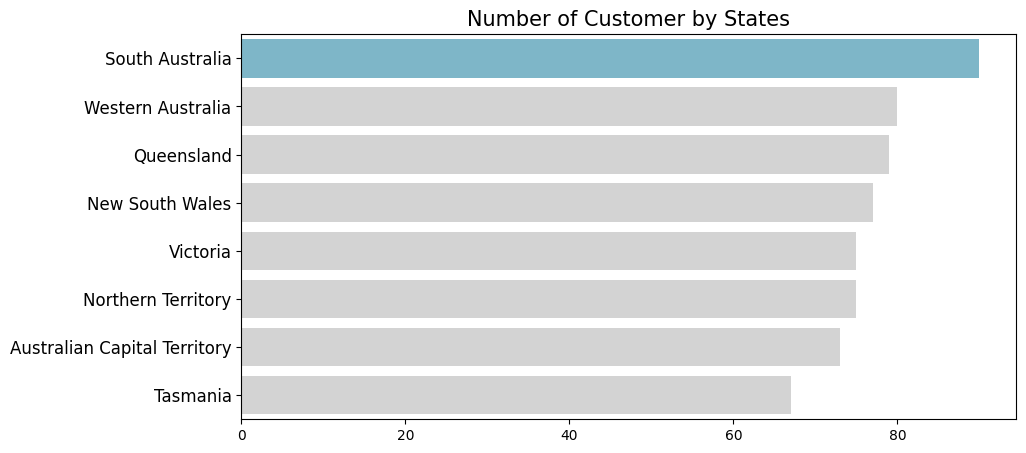

In [95]:
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

RFM Analysis

Untuk menjawab tiga pertanyaan analisis terakhir, kita bisa menggunakan teknik analisis lanjutan yang bernama RFM analysis. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

    Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
    Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
    Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [103]:
rfm_df = all_df.groupby(by=["customer_id", "customer_name"], as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "customer_name", "max_order_timestamp", "frequency", "monetary"]
  
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
  
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,customer_name,frequency,monetary,recency
0,1,fulan 1,3,1641,203
1,7,fulan 7,1,1017,156
2,10,fulan 10,1,270,229
3,11,fulan 11,1,382,149
4,12,fulan 12,1,1551,127


In [108]:
rfm_df.sort_values(by="frequency", ascending=False).head()

,customer_id,customer_name,frequency,monetary,recency
350,571,fulan 571,6,6640,66
212,348,fulan 348,5,5119,24
409,664,fulan 664,5,6341,20
166,282,fulan 282,5,7632,63
346,566,fulan 566,5,5435,5


In [109]:
rfm_df.sort_values(by="monetary", ascending=False).head()

,customer_id,customer_name,frequency,monetary,recency
166,282,fulan 282,5,7632,63
350,571,fulan 571,6,6640,66
409,664,fulan 664,5,6341,20
422,683,fulan 683,3,5657,110
120,206,fulan 206,4,5581,66


In [111]:
rfm_df.sort_values(by="recency").head()

,customer_id,customer_name,frequency,monetary,recency
426,690,fulan 690,3,3693,0
425,687,fulan 687,1,1122,0
241,401,fulan 401,4,3093,0
98,163,fulan 163,3,3494,1
250,415,fulan 415,2,2269,1


C:\Users\deryl\AppData\Local\Temp\ipykernel_23032\981294969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\deryl\AppData\Local\Temp\ipykernel_23032\981294969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\deryl\AppData\Local\Temp\ipykernel_23032\981294969.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` fo

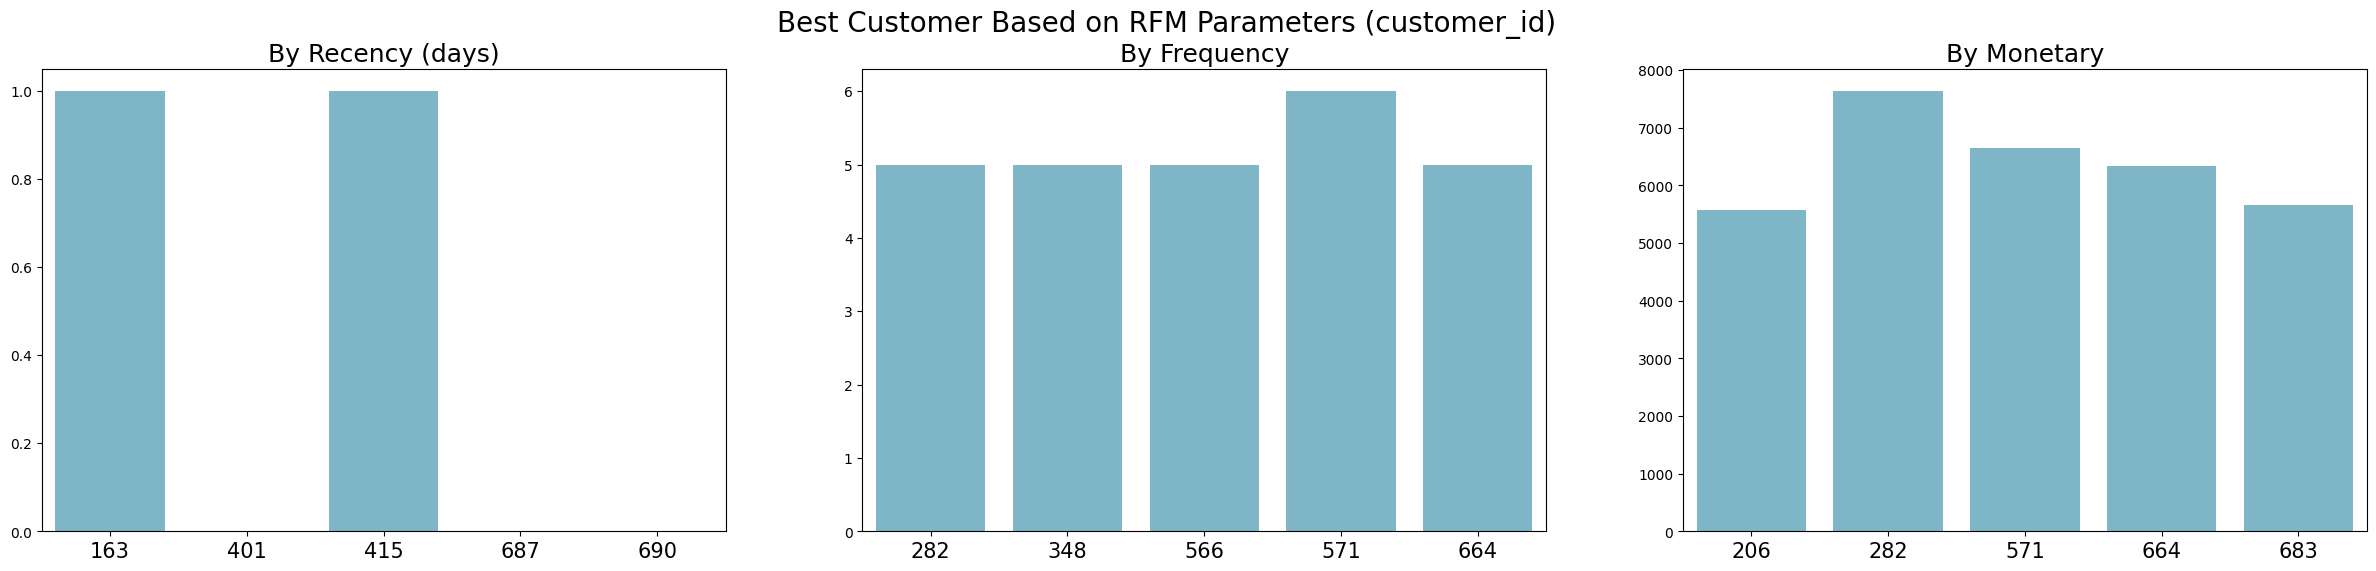

In [106]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
  
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
  
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
  
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
  
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
  
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()